<a href="https://colab.research.google.com/github/aekanun2020/AdvancedStat/blob/main/2025_ih_EGAT_Stationary_and_Moving_Averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

การตั้งค่าเสร็จสมบูรณ์ พร้อมสำหรับ Lab 2
สร้างชุดข้อมูลจำลองจำนวน 26281 แถว
Testing stationarity of raw data:
Stationarity Test for Raw Data:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.6784
p-value: 0.4423
Critical Value (1%): -3.4365
Critical Value (5%): -2.8642
Critical Value (10%): -2.5682
Data is Non-stationary (p-value >= 0.05)


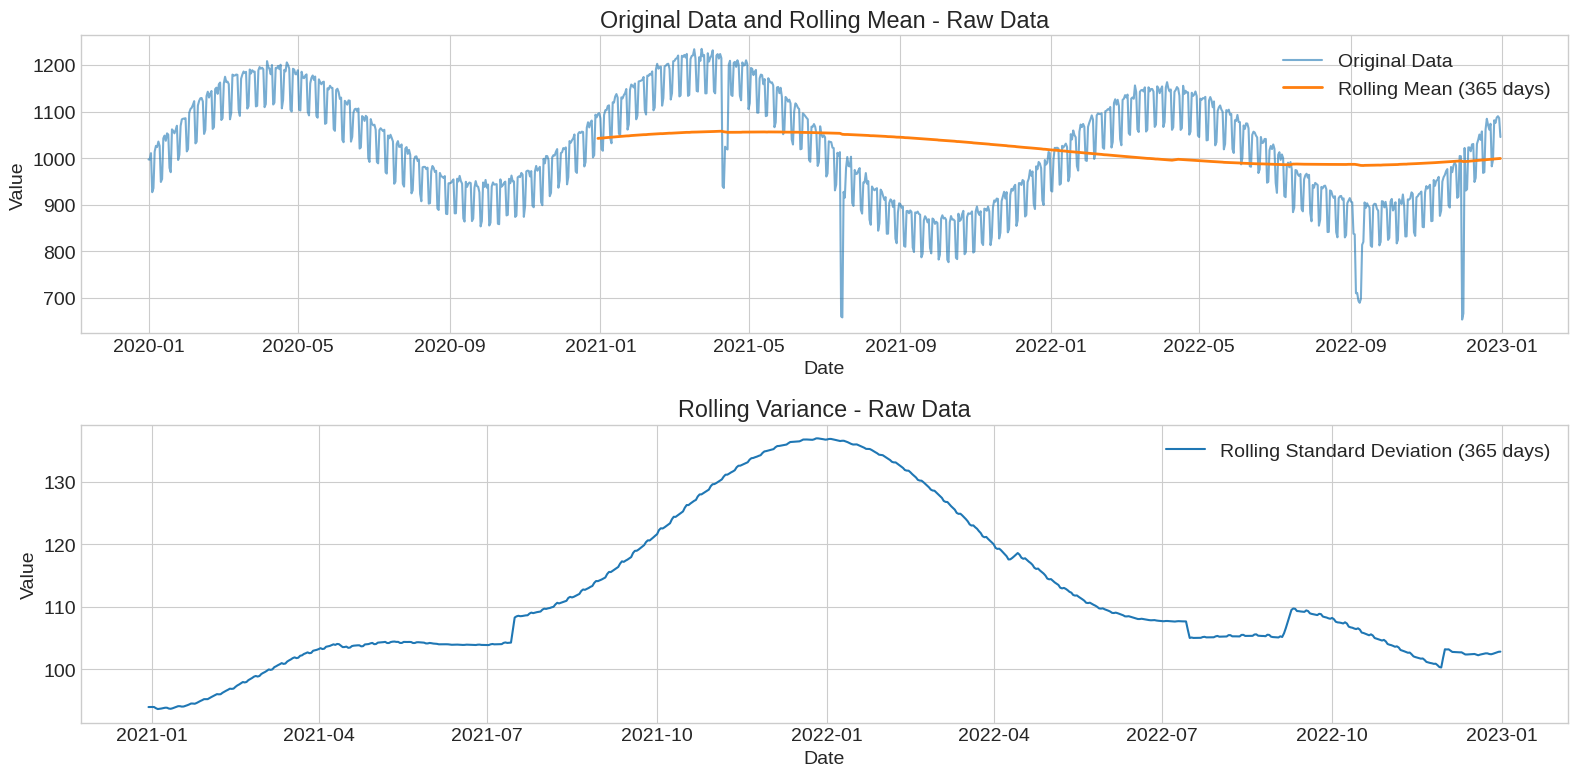


Testing stationarity after First-order differencing:
Stationarity Test for First-order differencing:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -6.0537
p-value: 0.0000
Critical Value (1%): -3.4365
Critical Value (5%): -2.8642
Critical Value (10%): -2.5682
Data is Stationary (p-value < 0.05)


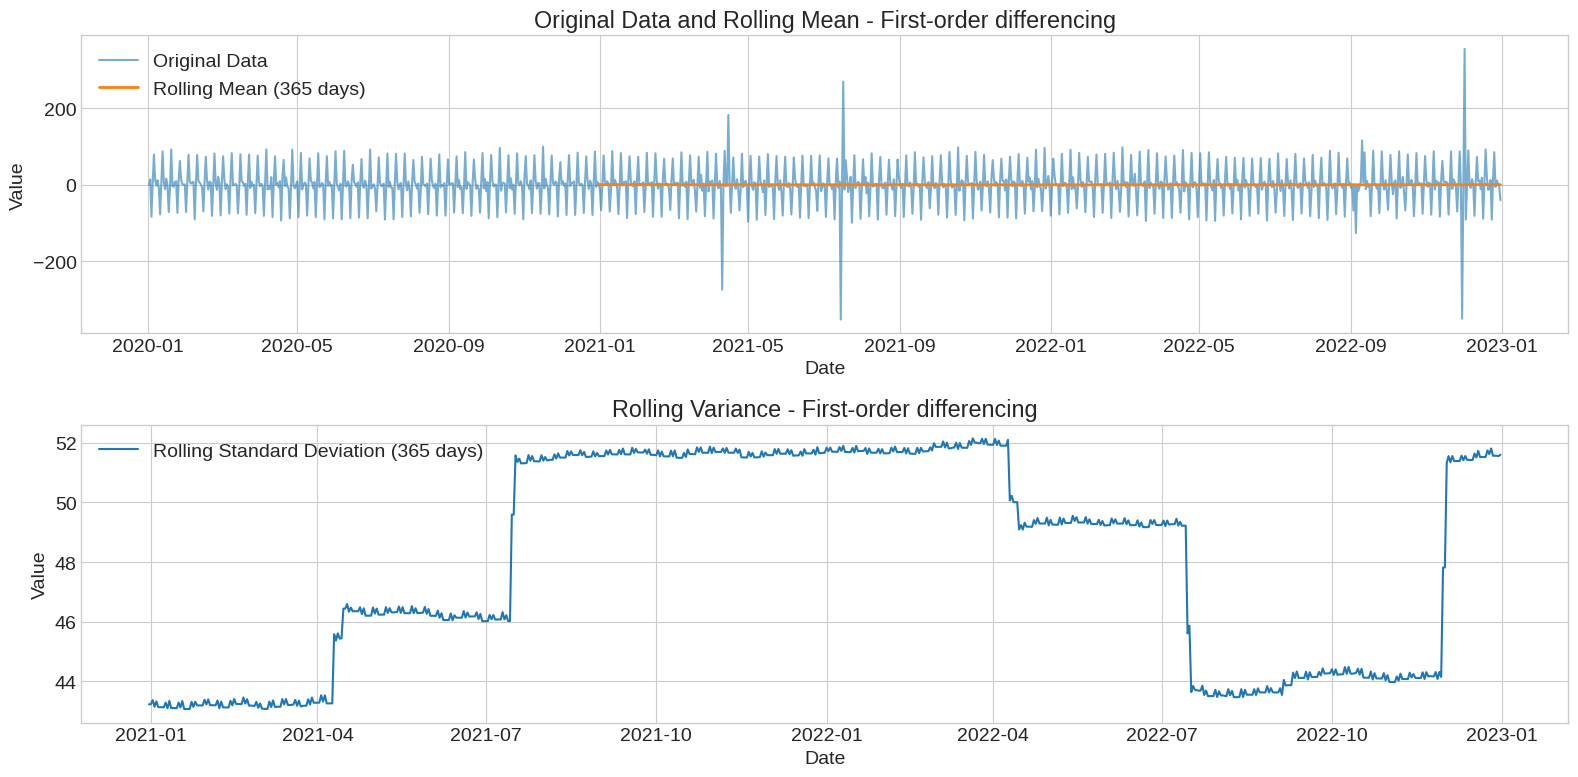


Testing stationarity after Log Transformation:
Stationarity Test for Log Transformation:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.6395
p-value: 0.4625
Critical Value (1%): -3.4365
Critical Value (5%): -2.8642
Critical Value (10%): -2.5682
Data is Non-stationary (p-value >= 0.05)


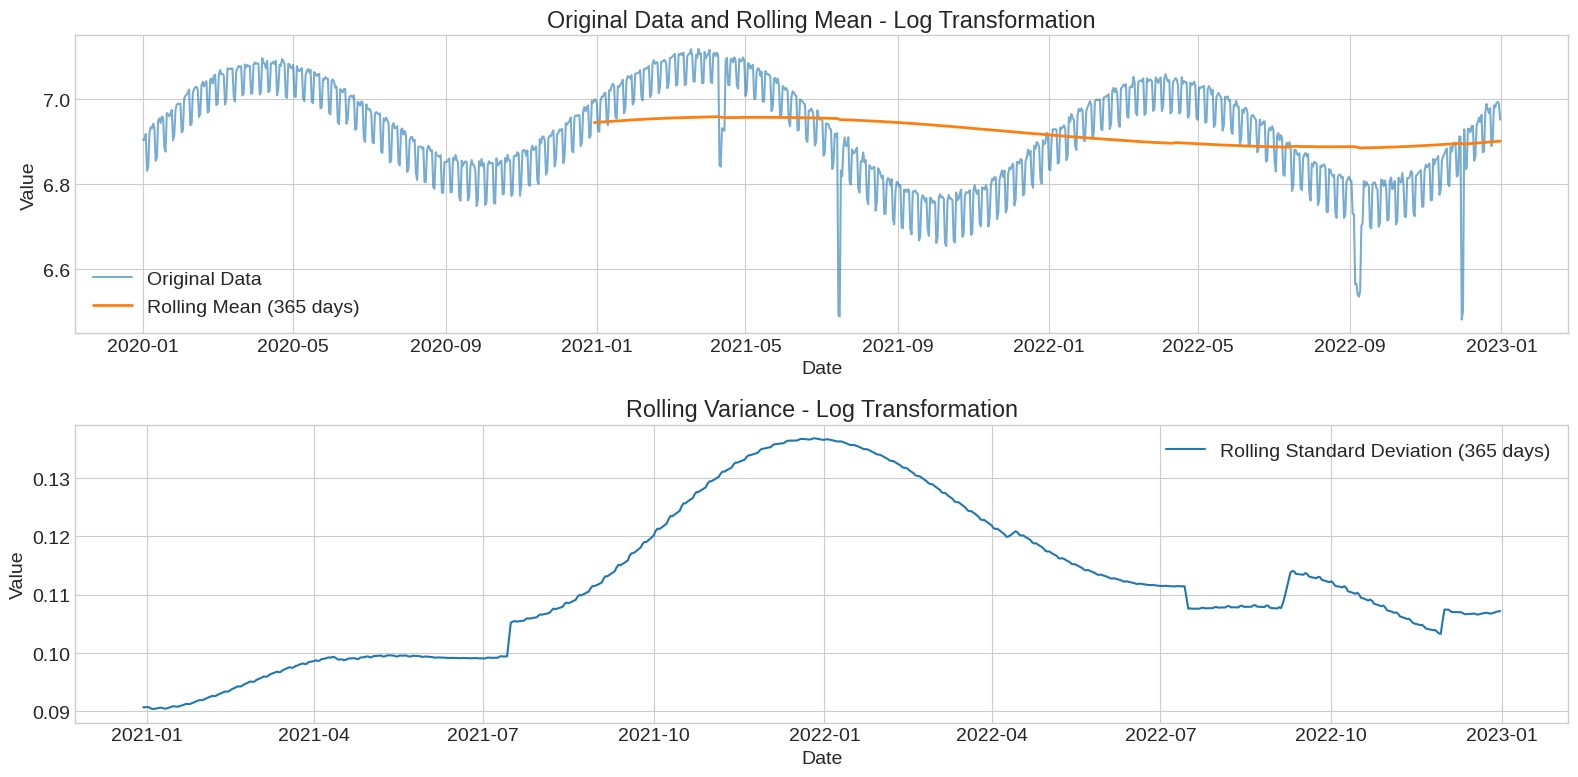


Testing stationarity after Log Transformation and Differencing:
Stationarity Test for Log Transformation + Differencing:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -6.6304
p-value: 0.0000
Critical Value (1%): -3.4365
Critical Value (5%): -2.8642
Critical Value (10%): -2.5682
Data is Stationary (p-value < 0.05)


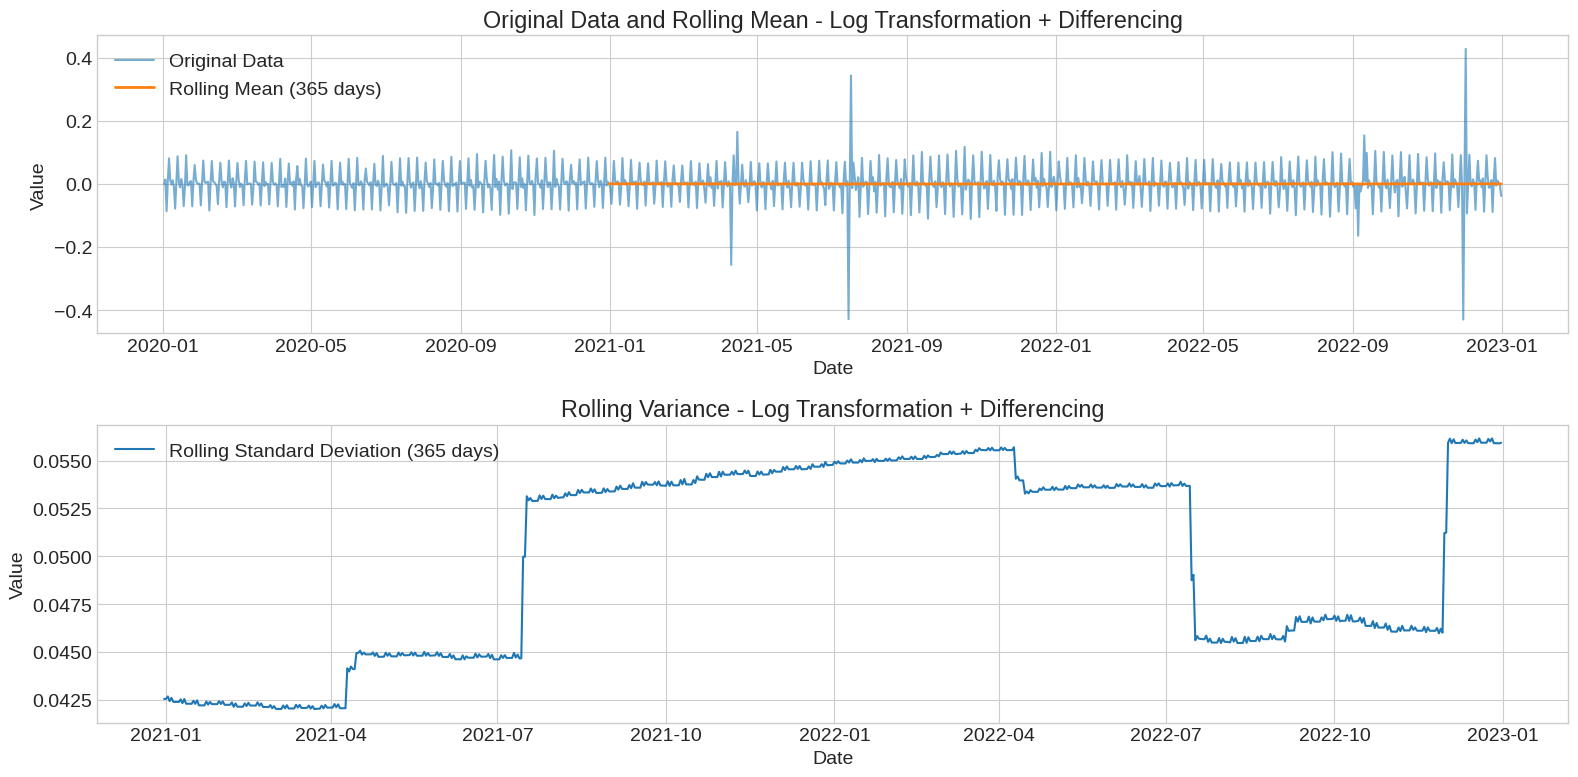


Testing stationarity after Seasonal Differencing (yearly):
Stationarity Test for Seasonal Differencing (yearly):
Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.4025
p-value: 0.5811
Critical Value (1%): -3.4396
Critical Value (5%): -2.8656
Critical Value (10%): -2.5689
Data is Non-stationary (p-value >= 0.05)


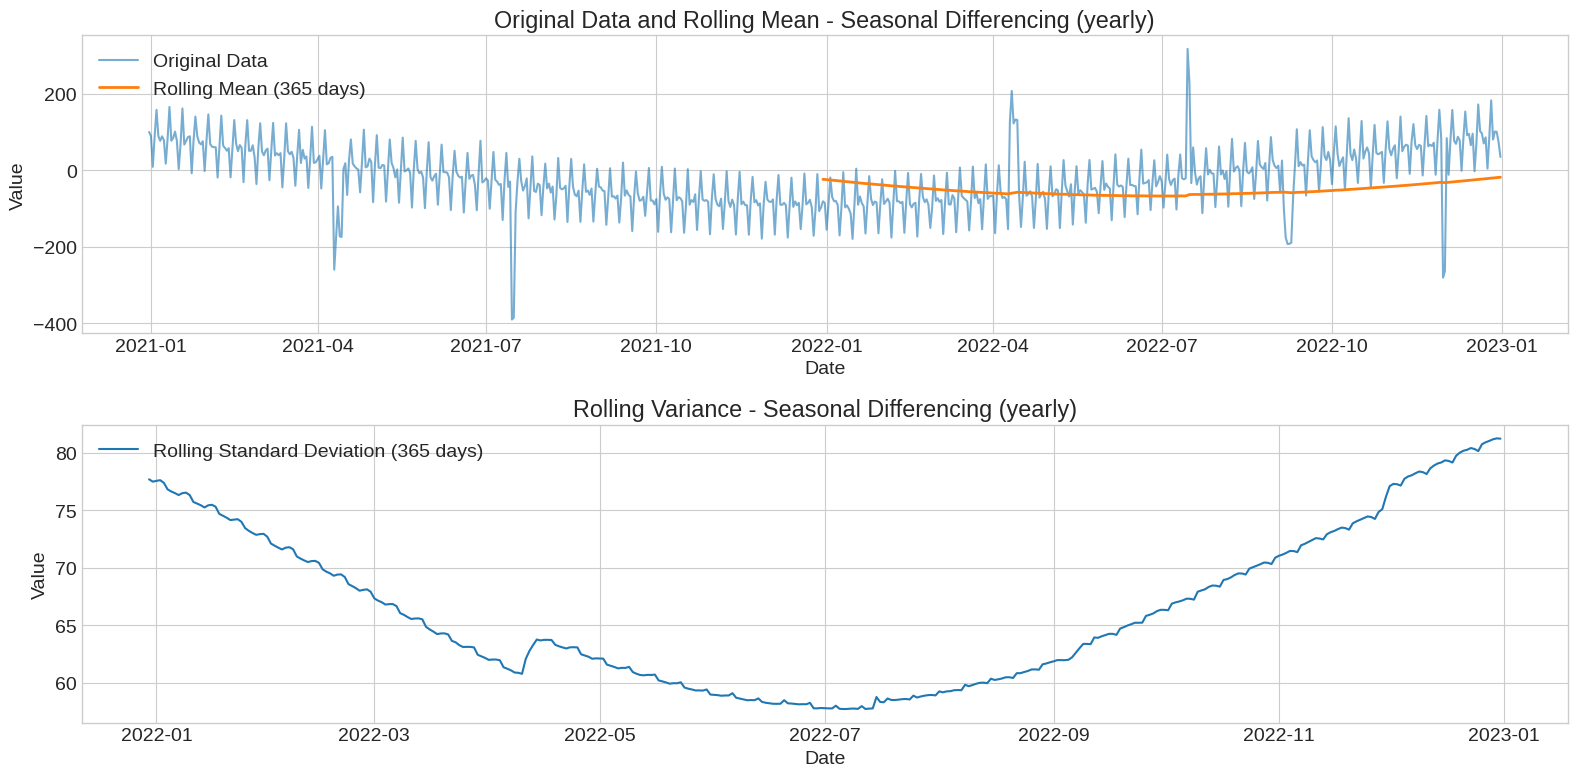


Testing stationarity after First-order and Seasonal Differencing:
Stationarity Test for First-order + Seasonal Differencing:
Augmented Dickey-Fuller Test Results:
ADF Statistic: -8.6749
p-value: 0.0000
Critical Value (1%): -3.4396
Critical Value (5%): -2.8656
Critical Value (10%): -2.5689
Data is Stationary (p-value < 0.05)


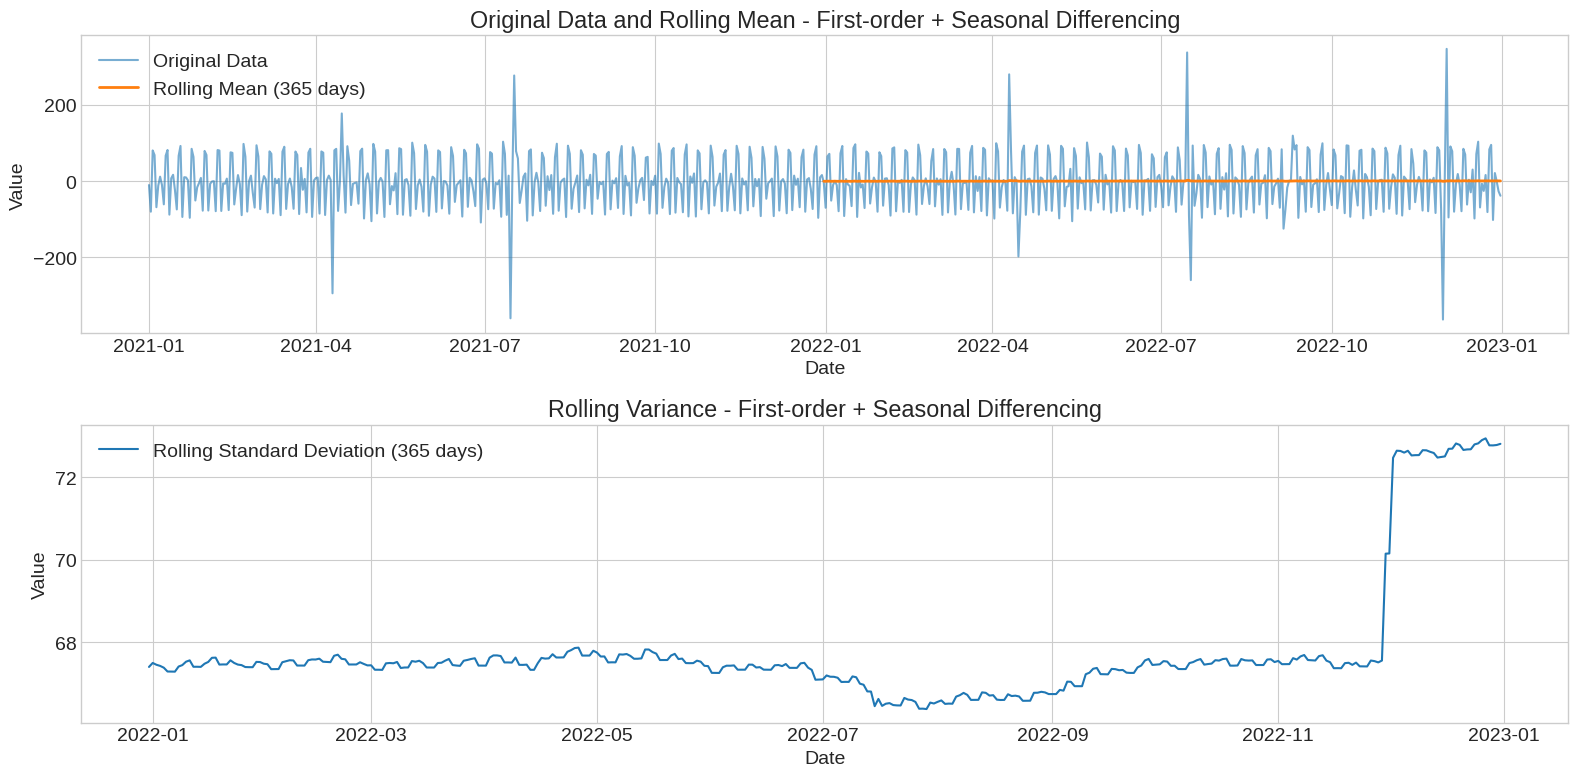

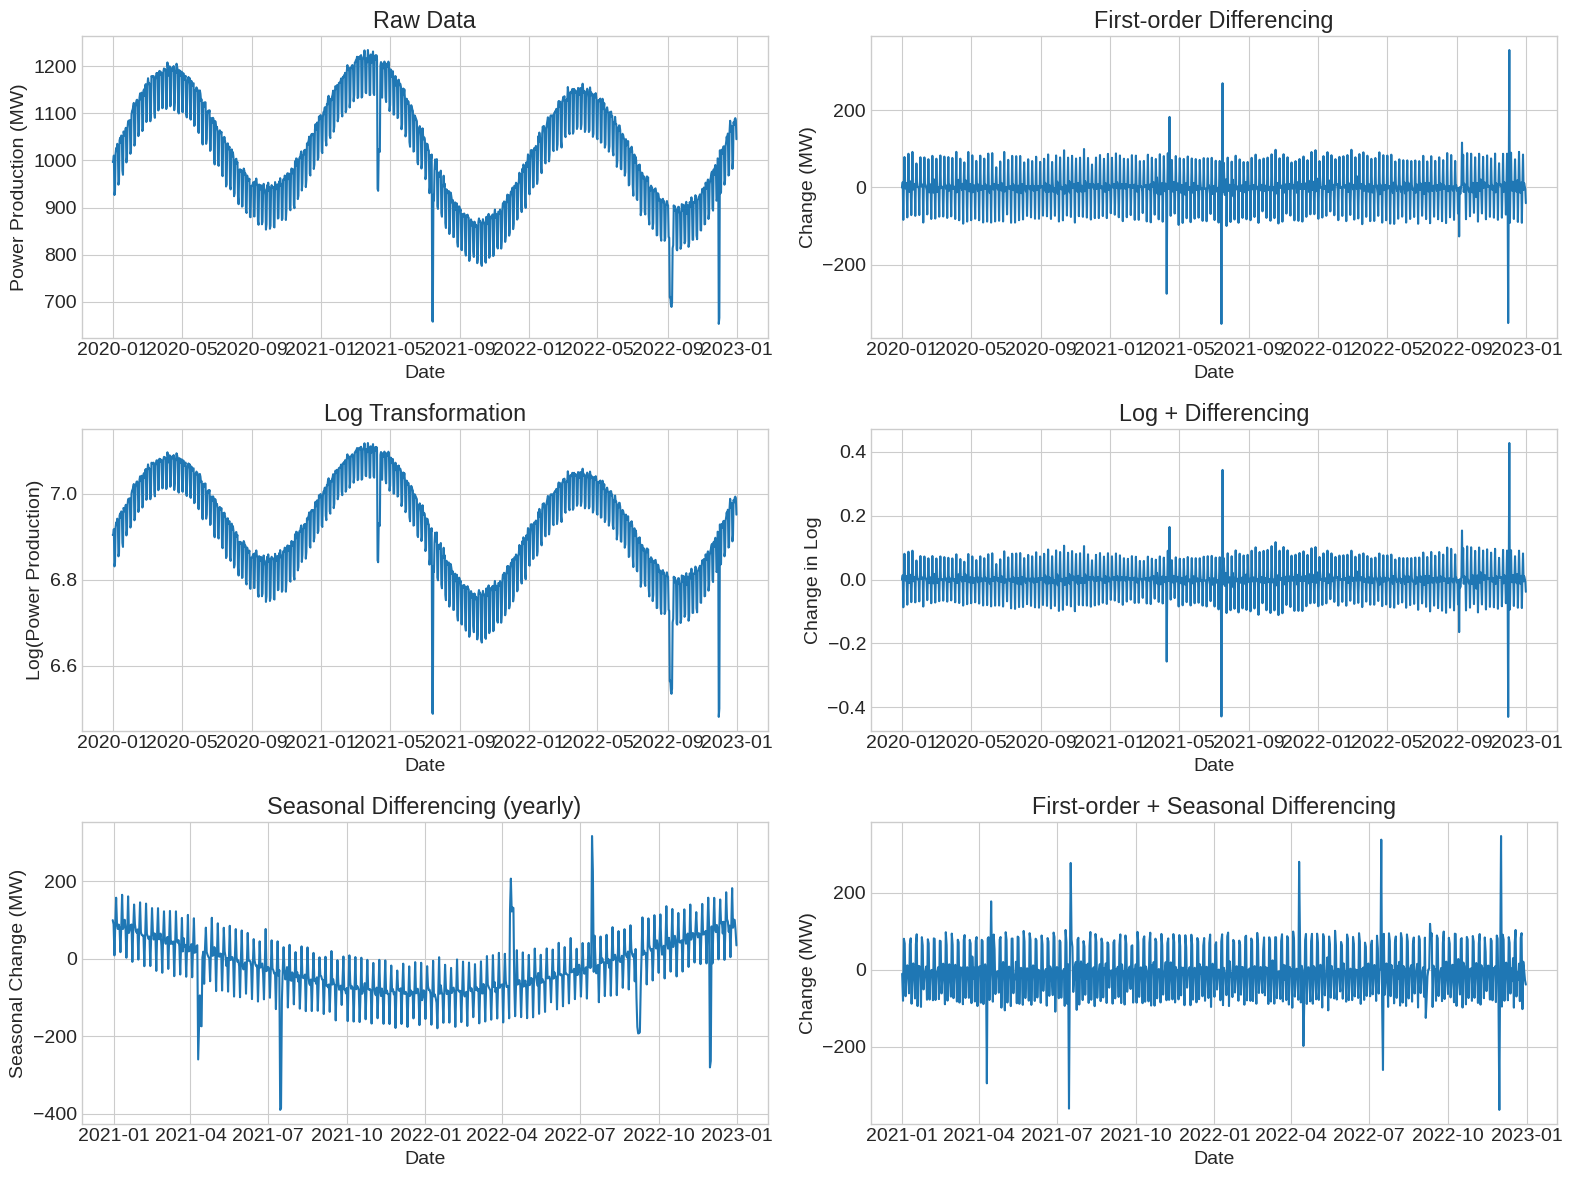

Summary of stationarity tests:
                     Method Is Stationary
0                  Raw Data            No
1  First-order Differencing           Yes
2        Log Transformation            No
3        Log + Differencing           Yes
4     Seasonal Differencing            No
5    First-order + Seasonal           Yes
Simple Moving Averages (SMA):


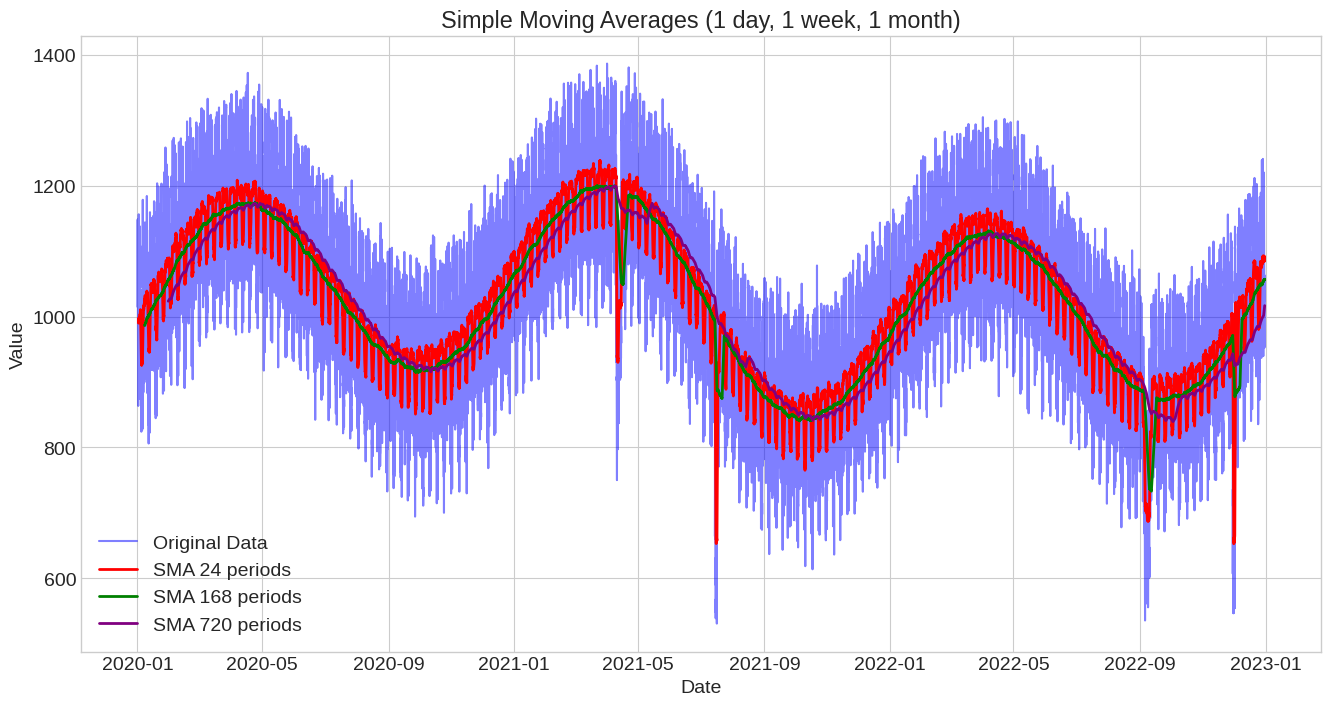

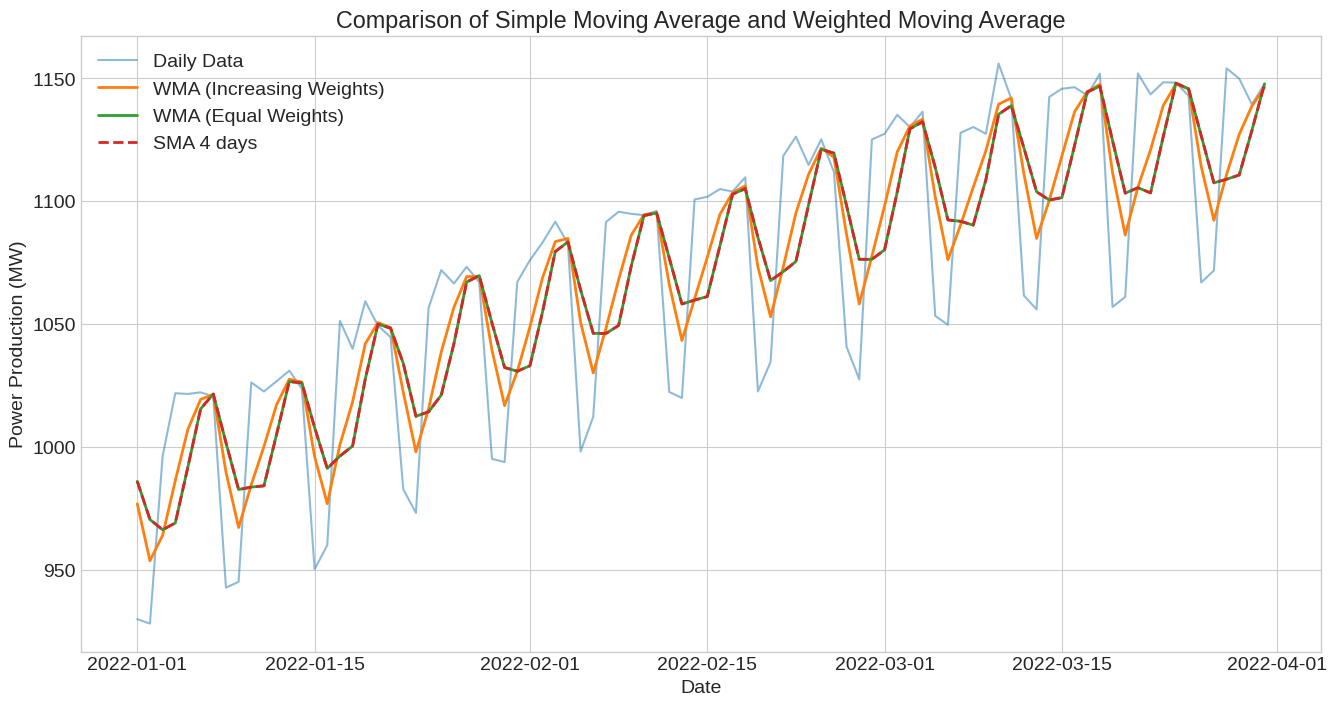

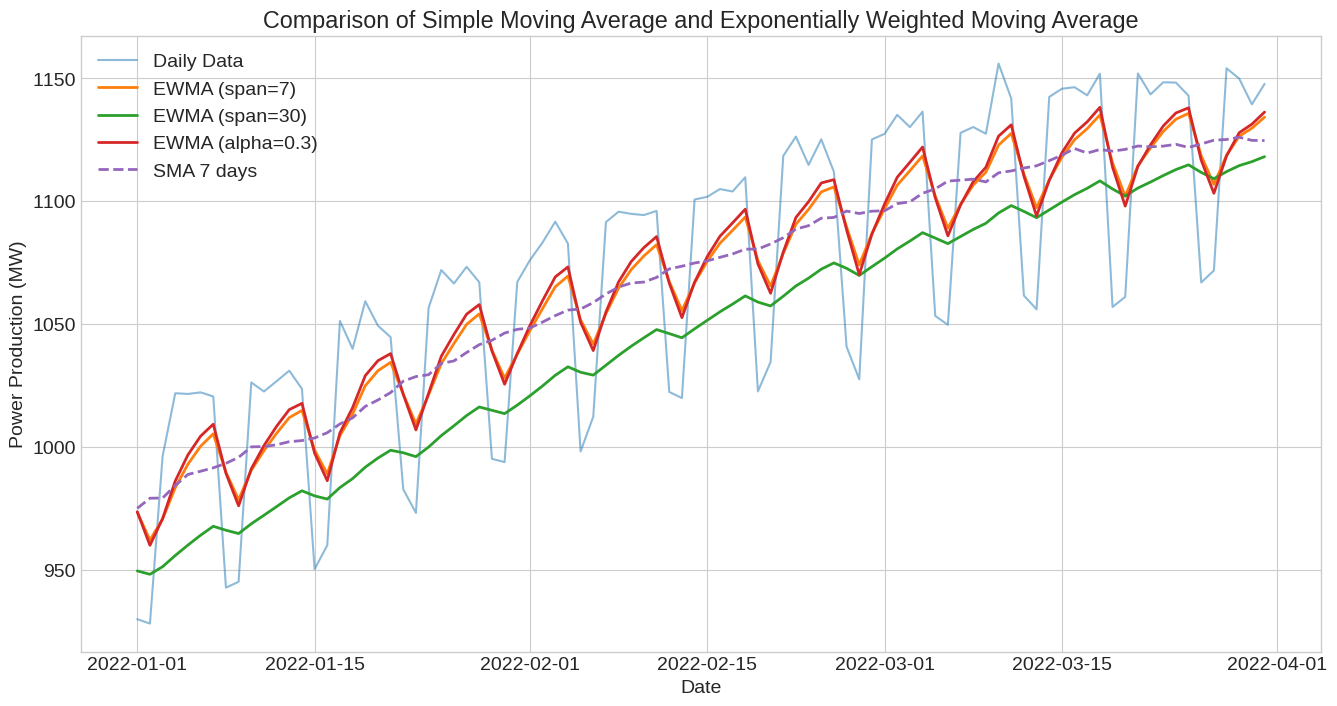

Simple Forecasting Results with Moving Averages (First 7 days):
                 Actual        SMA 7      SMA 30       EWMA 7
2022-07-01  1019.744871  1004.097255  1030.67537  1015.013769
2022-07-02   946.574064  1004.097255  1030.67537  1015.013769
2022-07-03   925.166111  1004.097255  1030.67537  1015.013769
2022-07-04  1007.119063  1004.097255  1030.67537  1015.013769
2022-07-05  1012.570964  1004.097255  1030.67537  1015.013769
2022-07-06   995.998773  1004.097255  1030.67537  1015.013769
2022-07-07  1007.731063  1004.097255  1030.67537  1015.013769

Error Comparison of Different Methods:
        SMA 7 days   SMA 30 days  EWMA (span=7)
MSE   12788.168208  17743.975428   14652.712587
RMSE    113.084783    133.206514     121.048389
MAE      92.063231    112.417371     100.087851
MAPE     10.678128     12.986641      11.593322


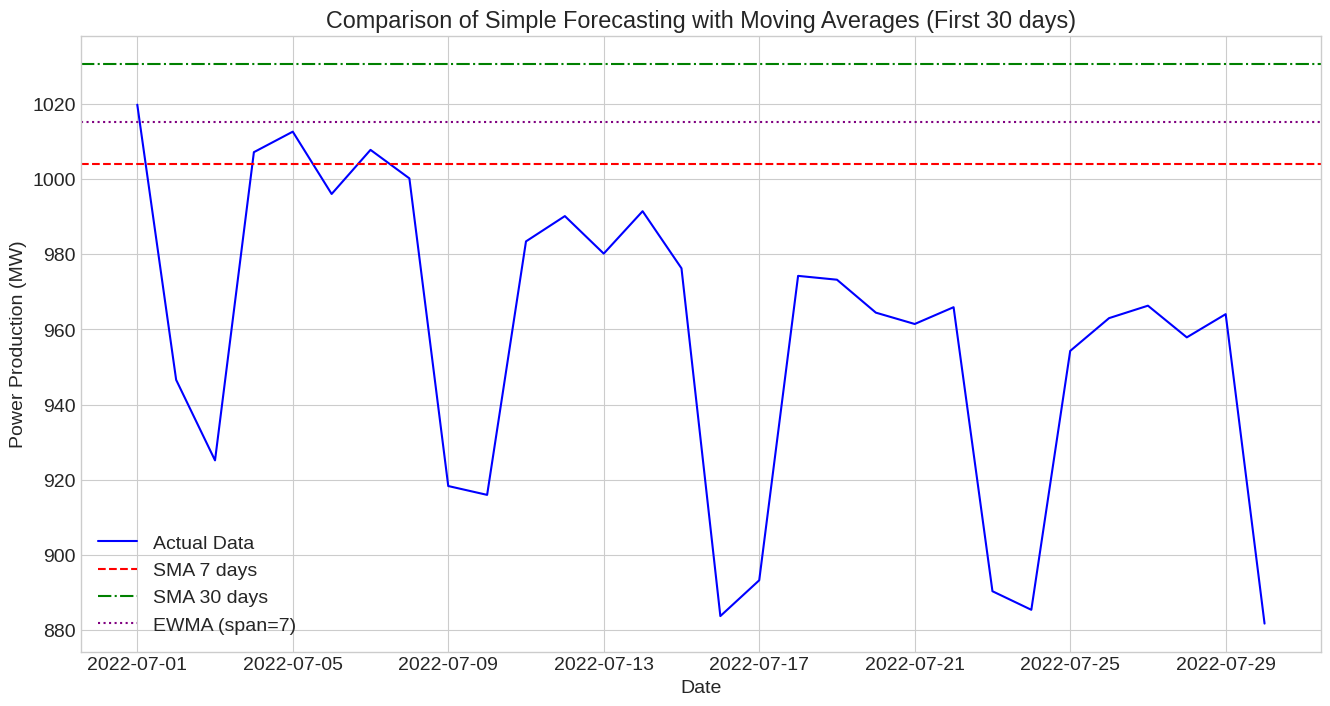

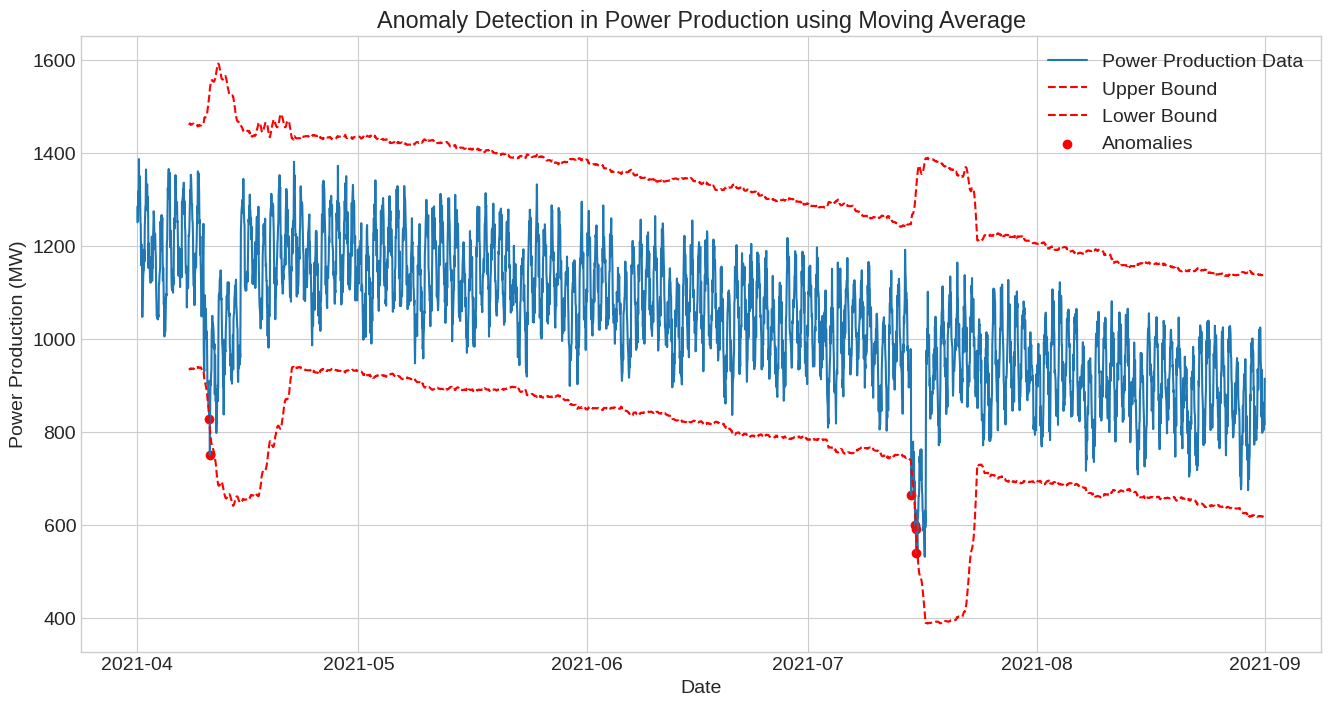

Found 6 anomalies out of 3672 data points
Anomalies represent 0.16% of the data


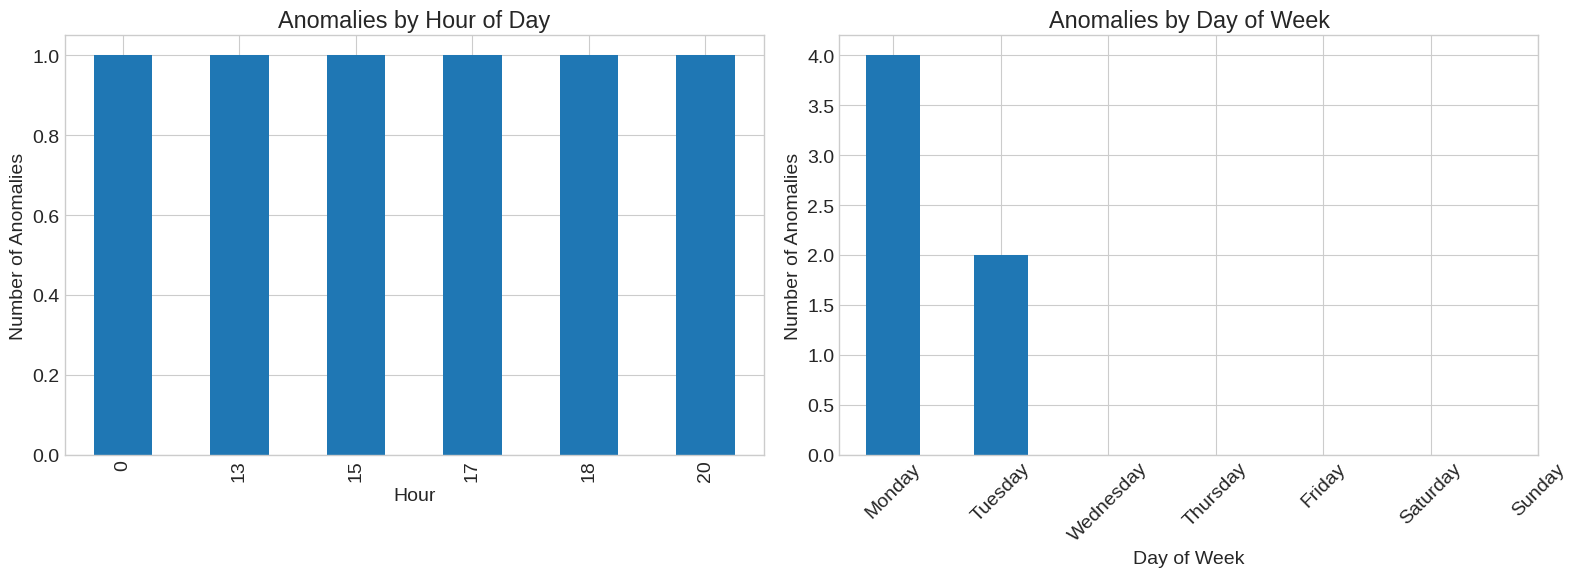

ACF and PACF of Raw Data (Daily):


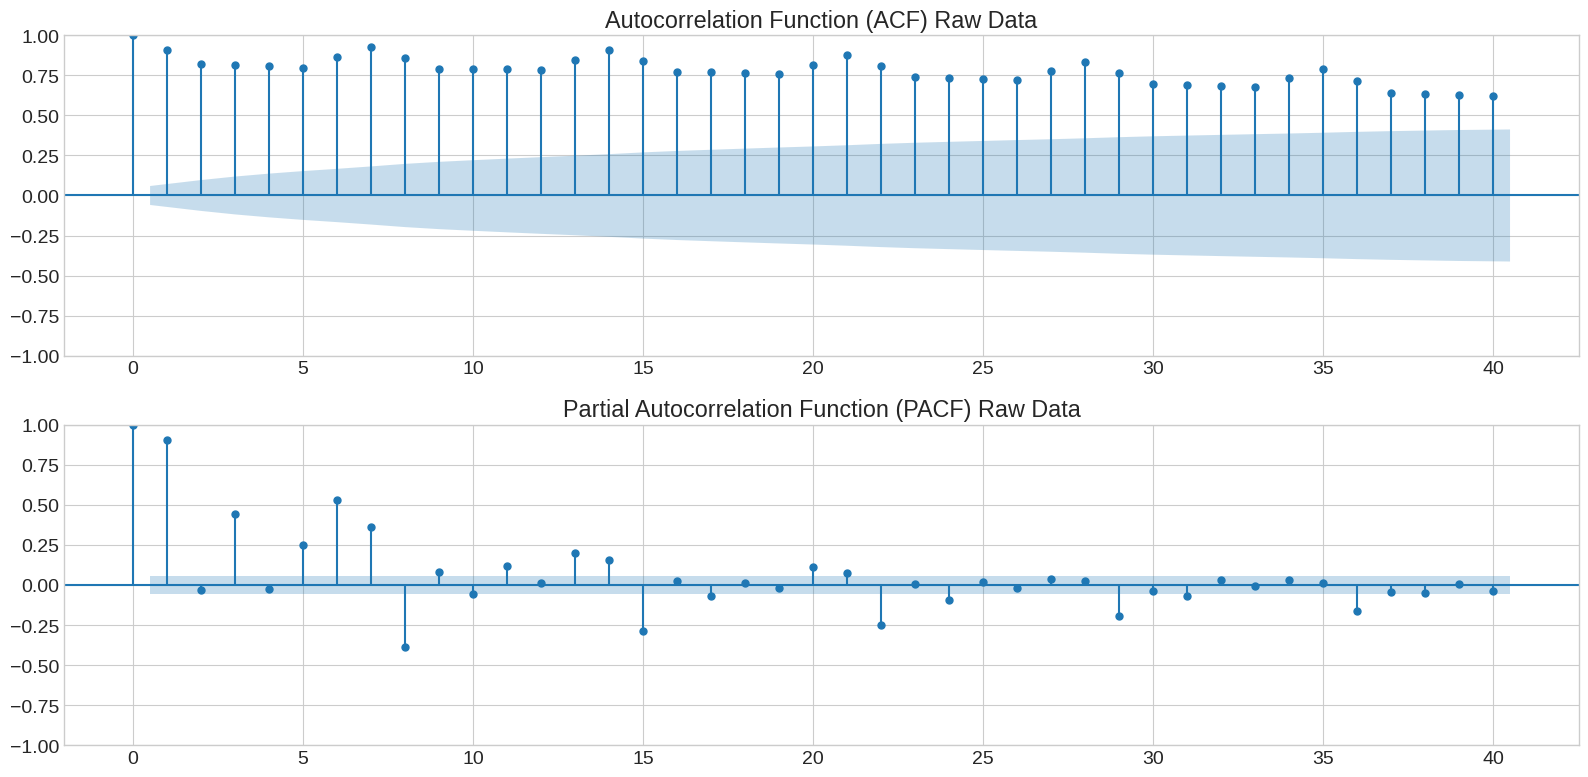

ACF and PACF after First-order Differencing:


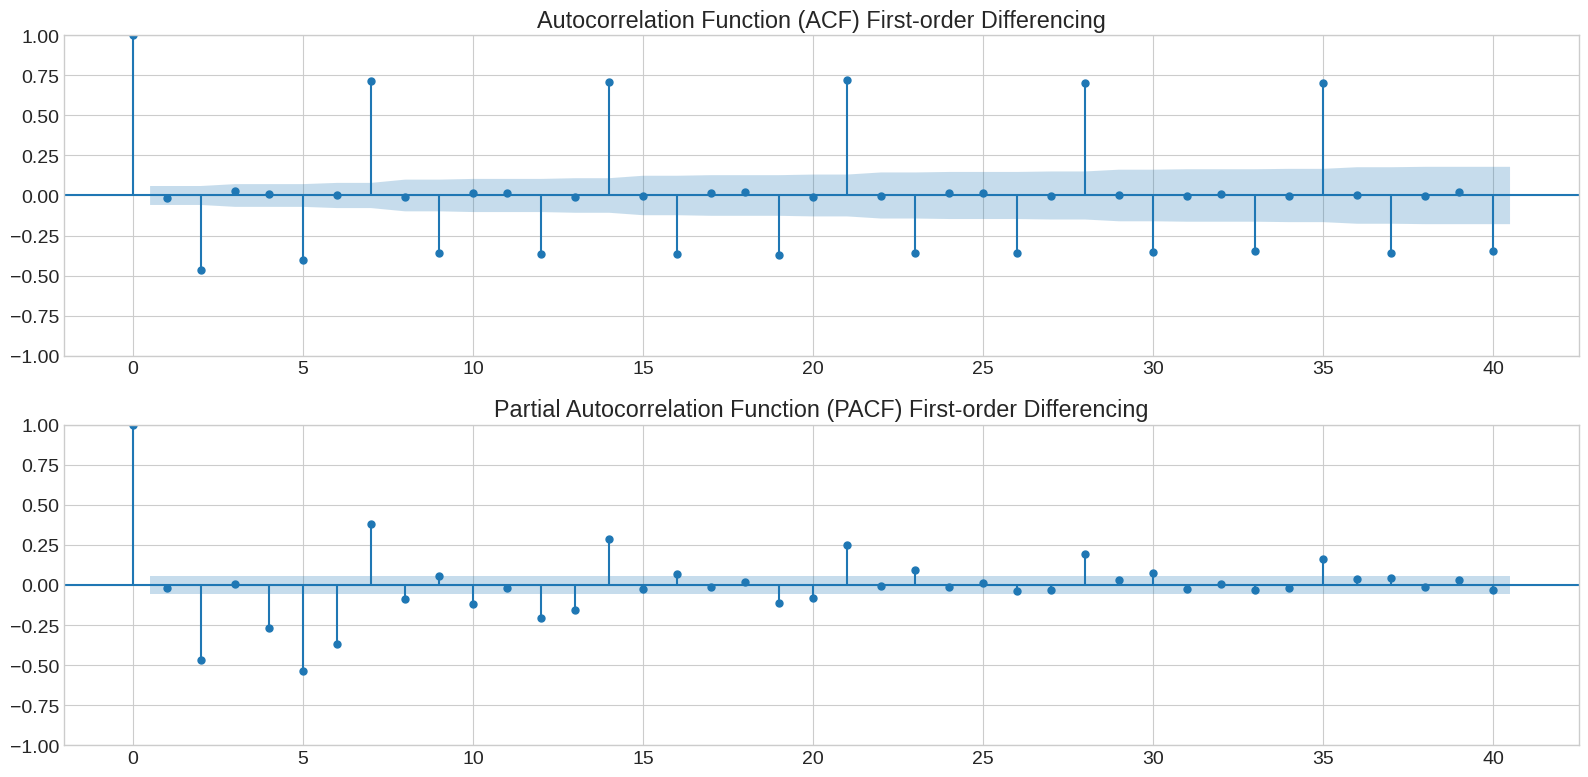

ACF and PACF after Seasonal Differencing:


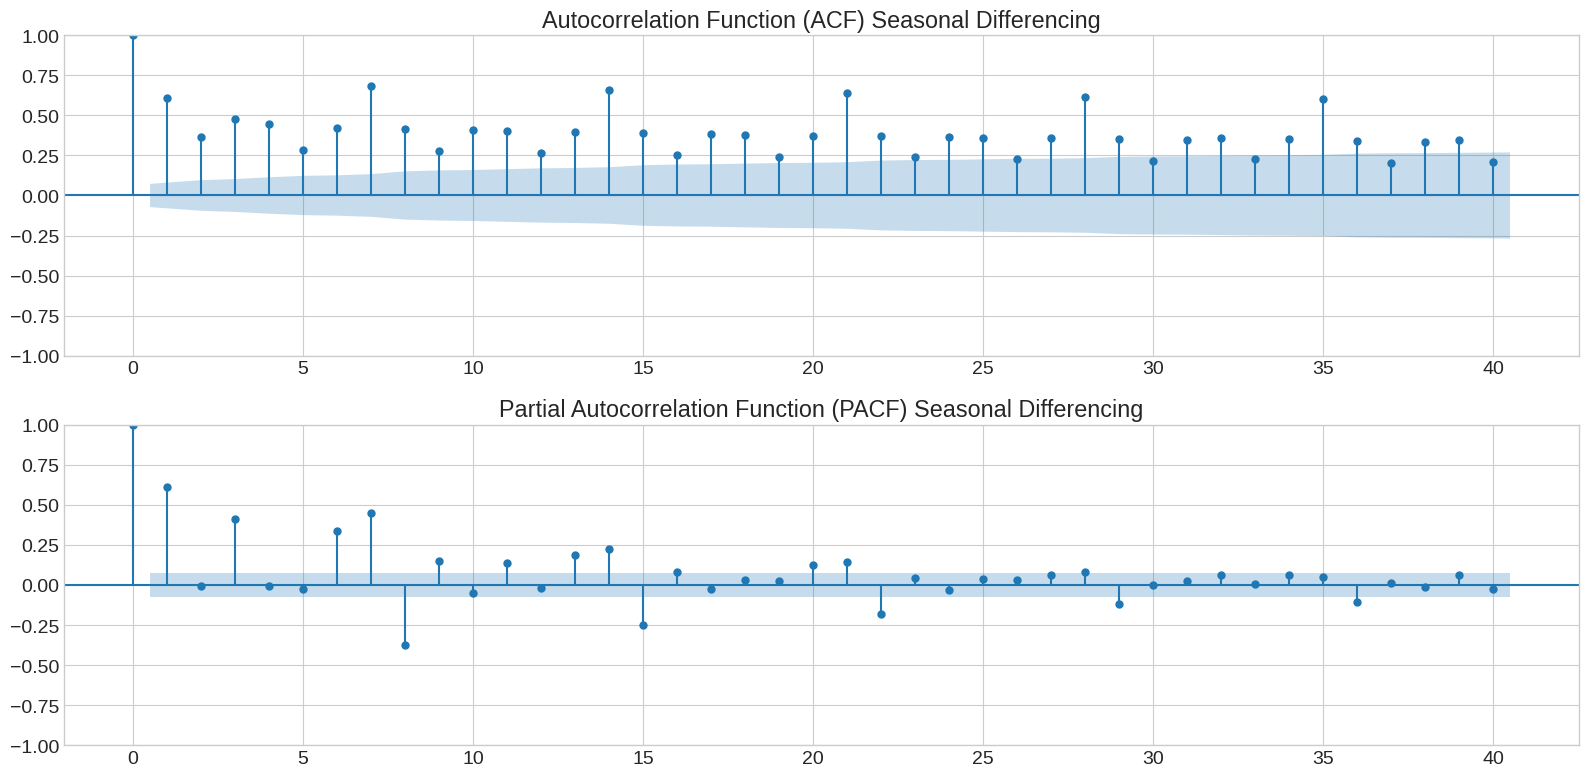

ACF and PACF after First-order and Seasonal Differencing:


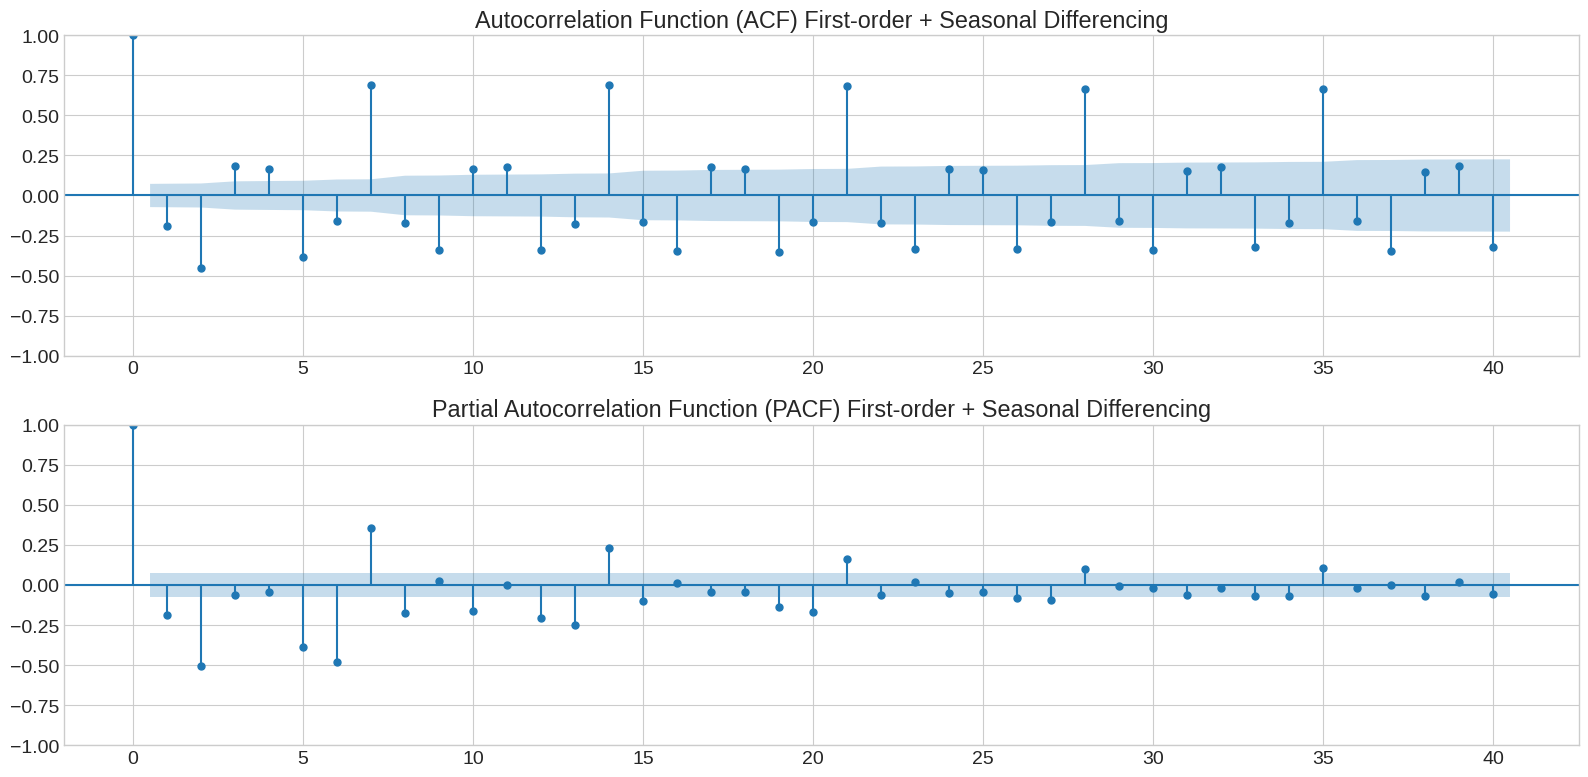

ARIMA Parameter Recommendations based on ACF and PACF Analysis:
                                  Data  p (AR) d (Differencing)  q (MA)  \
0                             Raw Data       2                0       2   
1             First-order Differencing       1                1       1   
2                Seasonal Differencing       1              365       1   
3  First-order + Seasonal Differencing       1            1+365       1   

          Recommended Model  
0              ARIMA(2,0,2)  
1              ARIMA(1,1,1)  
2  SARIMA(1,0,1)(0,1,0,365)  
3  SARIMA(1,1,1)(0,1,0,365)  


In [1]:
# Lab 2: การทำข้อมูลให้คงที่ (Stationarity) และ Moving Averages

# การติดตั้งแพ็คเกจที่จำเป็น
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# ปรับการแสดงผลกราฟให้สวยงาม
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 14

print("การตั้งค่าเสร็จสมบูรณ์ พร้อมสำหรับ Lab 2")

# %% [markdown]
# ## สร้างข้อมูลจำลองใหม่หรือโหลดข้อมูลที่สร้างจาก Lab 1
#
# เราจะสร้างข้อมูลจำลองใหม่เหมือนกับใน Lab 1 เพื่อให้สามารถรันแยกกันได้

# %%
# สร้างชุดข้อมูลจำลอง
def create_power_production_data(start_date='2020-01-01', end_date='2022-12-31'):
    # สร้างช่วงวันที่
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    df = pd.DataFrame(index=date_range)

    # 1. แนวโน้ม (Trend) - การเติบโตของความต้องการไฟฟ้า 3% ต่อปี
    days = (df.index - df.index[0]).total_seconds() / (24*60*60)
    daily_growth = (1.03)**(1/365)  # การเติบโต 3% ต่อปี
    trend = 1000 * (daily_growth ** (days))

    # 2. ฤดูกาล (Seasonality)
    # ฤดูกาลรายปี - ความต้องการไฟฟ้าเพิ่มขึ้นในฤดูร้อนและฤดูหนาว
    yearly_seasonality = 150 * np.sin(2 * np.pi * days / 365)

    # ฤดูกาลรายวัน - สูงในช่วงกลางวัน ต่ำในช่วงกลางคืน
    hour_of_day = df.index.hour
    daily_pattern = 100 * np.sin(np.pi * hour_of_day / 12)

    # ฤดูกาลรายสัปดาห์ - ต่ำในวันหยุดสุดสัปดาห์
    day_of_week = df.index.dayofweek
    weekly_pattern = np.where(day_of_week >= 5, -80, 0)  # ลด 80 หน่วยในวันเสาร์-อาทิตย์

    # 3. วัฏจักร (Cyclical) - วัฏจักรทางเศรษฐกิจประมาณ 3 ปี
    cycle_period = 3 * 365  # วัฏจักร 3 ปี
    cyclical = 70 * np.sin(2 * np.pi * days / cycle_period)

    # 4. Irregular Component - ความผันผวนทั่วไปและเหตุการณ์พิเศษ
    np.random.seed(42)  # ตั้งค่า seed สำหรับการสร้างค่าแบบสุ่ม
    irregular = np.random.normal(0, 30, len(df))

    # เพิ่มเหตุการณ์พิเศษบางวัน (เช่น ไฟดับหรือซ่อมบำรุงโรงไฟฟ้า)
    special_events = pd.Series(0, index=df.index)
    # สมมติว่ามีการซ่อมบำรุงโรงไฟฟ้าในบางช่วง
    maintenance_periods = [
        ('2021-04-10', '2021-04-15'),
        ('2022-09-05', '2022-09-10')
    ]

    for start, end in maintenance_periods:
        mask = (df.index >= start) & (df.index <= end)
        special_events[mask] = -200  # ลดการผลิตลง 200 หน่วย

    # สมมติว่ามีเหตุการณ์ฉุกเฉินทำให้โรงไฟฟ้าหยุดทำงานชั่วคราว
    emergency_dates = ['2021-07-15', '2022-11-30']
    for date in emergency_dates:
        # ส่งผลกระทบ 48 ชั่วโมง
        start_date = pd.Timestamp(date)
        end_date = start_date + pd.Timedelta(hours=48)
        mask = (df.index >= start_date) & (df.index < end_date)
        special_events[mask] = -350  # ลดการผลิตลง 350 หน่วย

    # รวมองค์ประกอบทั้งหมด
    df['power_production'] = trend + yearly_seasonality + daily_pattern + weekly_pattern + cyclical + irregular + special_events

    # ปรับให้ค่าต่ำสุดไม่น้อยกว่า 100 (กำลังการผลิตขั้นต่ำ)
    df['power_production'] = df['power_production'].clip(lower=100)

    # เพิ่มคอลัมน์ข้อมูลเวลาที่ง่ายต่อการวิเคราะห์
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_week'] = df.index.dayofweek
    df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

    return df

# สร้างข้อมูล
power_data = create_power_production_data()
print(f"สร้างชุดข้อมูลจำลองจำนวน {len(power_data)} แถว")

# แสดงข้อมูลตัวอย่าง
power_data.head()

# %% [markdown]
# ## ส่วนที่ 1: การตรวจสอบและทำให้ข้อมูล Time Series คงที่ (Stationarity)
#
# ข้อมูล Time Series คงที่ (Stationary) มีลักษณะสำคัญคือ:
# - มีค่าเฉลี่ยคงที่
# - มีความแปรปรวนคงที่
# - ไม่มีส่วนประกอบตามฤดูกาล
#
# การทำให้ข้อมูล Time Series คงที่เป็นขั้นตอนสำคัญก่อนการสร้างโมเดลพยากรณ์หลายประเภท เช่น ARIMA
#
# ในส่วนนี้เราจะ:
# 1. ตรวจสอบความคงที่ของข้อมูลด้วย Augmented Dickey-Fuller test (ADF test)
# 2. ทำการแปลงข้อมูลให้คงที่ด้วยวิธีต่างๆ

# %%
# ตรวจสอบความคงที่ด้วย ADF test
def check_stationarity(series, window=365, title=""):
    """
    ตรวจสอบความคงที่ของข้อมูล Time Series

    Parameters:
    ----------
    series : pandas.Series
        อนุกรมเวลาที่ต้องการตรวจสอบ
    window : int
        ขนาดหน้าต่างสำหรับการคำนวณค่าเฉลี่ยและความแปรปรวนเคลื่อนที่
    title : str
        ชื่อสำหรับใช้ในการแสดงผล
    """
    # Augmented Dickey-Fuller test
    result = adfuller(series.dropna())

    print(f'Stationarity Test for {title}:')
    print(f'Augmented Dickey-Fuller Test Results:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.4f}')

    # ถ้า p-value < 0.05, ปฏิเสธสมมติฐานหลัก (H0) และสรุปว่าข้อมูลคงที่
    if result[1] < 0.05:
        print("Data is Stationary (p-value < 0.05)")
    else:
        print("Data is Non-stationary (p-value >= 0.05)")

    # สร้างกราฟแสดงค่าเฉลี่ยและความแปรปรวนเคลื่อนที่
    plt.figure(figsize=(16, 8))

    # ดาวน์แซมเปิลข้อมูลรายวันก่อนวิเคราะห์ (ถ้าเป็นรายชั่วโมง)
    if isinstance(series.index, pd.DatetimeIndex) and series.index.freq == 'H':
        series = series.resample('D').mean()

    # ค่าเฉลี่ยเคลื่อนที่และความแปรปรวนเคลื่อนที่
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.subplot(2, 1, 1)
    plt.plot(series, label='Original Data', alpha=0.6)
    plt.plot(rolling_mean, label=f'Rolling Mean ({window} days)', linewidth=2)
    plt.legend()
    plt.title(f'Original Data and Rolling Mean - {title}')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.subplot(2, 1, 2)
    plt.plot(rolling_std, label=f'Rolling Standard Deviation ({window} days)')
    plt.legend()
    plt.title(f'Rolling Variance - {title}')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

    return result[1] < 0.05  # ส่งคืน True ถ้าข้อมูลคงที่

# ใช้ข้อมูลรายวันเพื่อลดเวลาในการประมวลผล
daily_data = power_data['power_production'].resample('D').mean()

# ตรวจสอบความคงที่ของข้อมูลดิบ (รายวัน)
print("Testing stationarity of raw data:")
is_stationary_original = check_stationarity(daily_data, title="Raw Data")

# %% [markdown]
# ### ใช้เทคนิคการแปลงข้อมูลให้คงที่ (Stationarity Transformations)
#
# หลังจากตรวจสอบแล้วว่าข้อมูลดิบไม่คงที่ เราจะใช้วิธีต่างๆ เพื่อแปลงข้อมูลให้คงที่:
#
# 1. การหาความแตกต่าง (Differencing)
# 2. การแปลงลอการิทึม (Log Transformation)
# 3. การปรับฤดูกาล (Seasonal Differencing)

# %%
# 1. การหาความแตกต่าง (Differencing)
# First-order differencing
diff_1 = daily_data.diff().dropna()

# ตรวจสอบความคงที่หลังจาก First-order differencing
print("\nTesting stationarity after First-order differencing:")
is_stationary_diff1 = check_stationarity(diff_1, title="First-order differencing")

# 2. การแปลงลอการิทึม (Log Transformation)
# ใช้สำหรับข้อมูลที่มีความแปรปรวนเพิ่มขึ้นตามเวลา
log_data = np.log(daily_data)
print("\nTesting stationarity after Log Transformation:")
is_stationary_log = check_stationarity(log_data, title="Log Transformation")

# 3. การรวม Differencing กับ Log Transformation
log_diff_data = np.log(daily_data).diff().dropna()
print("\nTesting stationarity after Log Transformation and Differencing:")
is_stationary_log_diff = check_stationarity(log_diff_data, title="Log Transformation + Differencing")

# 4. การปรับฤดูกาล (Seasonal Differencing)
# หาความแตกต่างตามฤดูกาล (รายปี)
seasonal_diff = daily_data.diff(365).dropna()
print("\nTesting stationarity after Seasonal Differencing (yearly):")
is_stationary_seasonal = check_stationarity(seasonal_diff, title="Seasonal Differencing (yearly)")

# 5. การรวม First-order และ Seasonal Differencing
diff_seasonal = daily_data.diff(365).diff(1).dropna()
print("\nTesting stationarity after First-order and Seasonal Differencing:")
is_stationary_both = check_stationarity(diff_seasonal, title="First-order + Seasonal Differencing")

# %% [markdown]
# ### เปรียบเทียบผลของการแปลงข้อมูล
#
# เราจะเปรียบเทียบลักษณะของข้อมูลหลังการแปลงด้วยวิธีต่างๆ

# %%
# สร้างตารางเปรียบเทียบ
methods = ["Raw Data", "First-order Differencing", "Log Transformation",
          "Log + Differencing", "Seasonal Differencing", "First-order + Seasonal"]

is_stationary = [is_stationary_original, is_stationary_diff1, is_stationary_log,
                is_stationary_log_diff, is_stationary_seasonal, is_stationary_both]

# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.plot(daily_data)
plt.title("Raw Data")
plt.xlabel("Date")
plt.ylabel("Power Production (MW)")

plt.subplot(3, 2, 2)
plt.plot(diff_1)
plt.title("First-order Differencing")
plt.xlabel("Date")
plt.ylabel("Change (MW)")

plt.subplot(3, 2, 3)
plt.plot(log_data)
plt.title("Log Transformation")
plt.xlabel("Date")
plt.ylabel("Log(Power Production)")

plt.subplot(3, 2, 4)
plt.plot(log_diff_data)
plt.title("Log + Differencing")
plt.xlabel("Date")
plt.ylabel("Change in Log")

plt.subplot(3, 2, 5)
plt.plot(seasonal_diff)
plt.title("Seasonal Differencing (yearly)")
plt.xlabel("Date")
plt.ylabel("Seasonal Change (MW)")

plt.subplot(3, 2, 6)
plt.plot(diff_seasonal)
plt.title("First-order + Seasonal Differencing")
plt.xlabel("Date")
plt.ylabel("Change (MW)")

plt.tight_layout()
plt.show()

# สร้างตาราง
stationarity_table = pd.DataFrame({
    'Method': methods,
    'Is Stationary': ['Yes' if stat else 'No' for stat in is_stationary]
})

print("Summary of stationarity tests:")
print(stationarity_table)

# %% [markdown]
# ## ส่วนที่ 2: การวิเคราะห์ด้วย Moving Averages
#
# Moving Averages (ค่าเฉลี่ยเคลื่อนที่) เป็นเทคนิคพื้นฐานที่ใช้ในการ:
# 1. ปรับเรียบข้อมูลเพื่อลดความผันผวน
# 2. ระบุแนวโน้มในระยะสั้น-กลาง
# 3. ใช้ในการพยากรณ์อย่างง่าย
#
# ในส่วนนี้เราจะศึกษา:
# - Simple Moving Average (SMA)
# - Weighted Moving Average (WMA)
# - Exponentially Weighted Moving Average (EWMA)

# %%
# Simple Moving Average (SMA)
def plot_moving_averages(series, windows=[24, 168, 730], title="Moving Averages"):
    """
    สร้างกราฟแสดง Simple Moving Averages หลายขนาดหน้าต่าง

    Parameters:
    ----------
    series : pandas.Series
        อนุกรมเวลาที่ต้องการวิเคราะห์
    windows : list
        รายการขนาดหน้าต่างที่ต้องการคำนวณ SMA
    title : str
        ชื่อกราฟ
    """
    plt.figure(figsize=(16, 8))
    plt.plot(series, label='Original Data', color='blue', alpha=0.5)

    colors = ['red', 'green', 'purple', 'orange', 'brown']
    for i, window in enumerate(windows):
        sma = series.rolling(window=window).mean()
        plt.plot(sma, label=f'SMA {window} periods', color=colors[i % len(colors)], linewidth=2)

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

# ใช้ข้อมูลรายชั่วโมงสำหรับการวิเคราะห์ Moving Averages
hourly_data = power_data['power_production']

# แสดง Simple Moving Averages สำหรับช่วงเวลาต่างๆ
print("Simple Moving Averages (SMA):")
plot_moving_averages(hourly_data, windows=[24, 7*24, 30*24],
                    title="Simple Moving Averages (1 day, 1 week, 1 month)")

# %%
# Weighted Moving Average (WMA)
def weighted_moving_average(series, weights):
    """
    คำนวณ Weighted Moving Average

    Parameters:
    ----------
    series : pandas.Series
        อนุกรมเวลาที่ต้องการวิเคราะห์
    weights : list
        รายการน้ำหนักที่ใช้ในการคำนวณ

    Returns:
    -------
    pandas.Series
        ผลลัพธ์ WMA
    """
    n = len(weights)
    if n == 0:
        return pd.Series()

    wma = pd.Series(index=series.index)
    weights_sum = sum(weights)
    weights = [w / weights_sum for w in weights]  # ปรับน้ำหนักให้ผลรวม = 1

    for i in range(n-1, len(series)):
        wma.iloc[i] = sum(weights[j] * series.iloc[i-n+j+1] for j in range(n))

    return wma

# คำนวณ WMA ด้วยน้ำหนักต่างๆ
# 1. ให้น้ำหนักมากกับข้อมูลล่าสุด
weights1 = [0.1, 0.2, 0.3, 0.4]  # น้ำหนักเพิ่มขึ้น
# 2. ให้น้ำหนักเท่ากัน (เหมือน SMA)
weights2 = [0.25, 0.25, 0.25, 0.25]  # น้ำหนักเท่ากัน

# ใช้ข้อมูลรายวันสำหรับความชัดเจน
sample_data = hourly_data.resample('D').mean()
wma1 = weighted_moving_average(sample_data, weights1)
wma2 = weighted_moving_average(sample_data, weights2)
sma4 = sample_data.rolling(window=4).mean()  # SMA ขนาดหน้าต่าง 4 วัน

# เปรียบเทียบ SMA และ WMA
plt.figure(figsize=(16, 8))
plt.plot(sample_data['2022-01-01':'2022-03-31'], label='Daily Data', alpha=0.5)
plt.plot(wma1['2022-01-01':'2022-03-31'], label='WMA (Increasing Weights)', linewidth=2)
plt.plot(wma2['2022-01-01':'2022-03-31'], label='WMA (Equal Weights)', linewidth=2)
plt.plot(sma4['2022-01-01':'2022-03-31'], label='SMA 4 days', linewidth=2, linestyle='--')

plt.title('Comparison of Simple Moving Average and Weighted Moving Average')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Power Production (MW)')
plt.show()

# %%
# Exponentially Weighted Moving Average (EWMA)
# EWMA ให้น้ำหนักมากกับข้อมูลล่าสุดและลดลงแบบเอกซ์โพเนนเชียลสำหรับข้อมูลที่เก่ากว่า
ewma_span1 = sample_data.ewm(span=7).mean()  # span = 7 วัน
ewma_span2 = sample_data.ewm(span=30).mean()  # span = 30 วัน
ewma_alpha = sample_data.ewm(alpha=0.3).mean()  # alpha = 0.3

# เปรียบเทียบ EWMA กับ SMA
plt.figure(figsize=(16, 8))
plt.plot(sample_data['2022-01-01':'2022-03-31'], label='Daily Data', alpha=0.5)
plt.plot(ewma_span1['2022-01-01':'2022-03-31'], label='EWMA (span=7)', linewidth=2)
plt.plot(ewma_span2['2022-01-01':'2022-03-31'], label='EWMA (span=30)', linewidth=2)
plt.plot(ewma_alpha['2022-01-01':'2022-03-31'], label='EWMA (alpha=0.3)', linewidth=2)
plt.plot(sample_data.rolling(window=7).mean()['2022-01-01':'2022-03-31'],
         label='SMA 7 days', linewidth=2, linestyle='--')

plt.title('Comparison of Simple Moving Average and Exponentially Weighted Moving Average')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Power Production (MW)')
plt.show()

# %% [markdown]
# ### การใช้ Moving Average สำหรับการพยากรณ์อย่างง่าย
#
# เราสามารถใช้ค่าเฉลี่ยเคลื่อนที่ในการพยากรณ์อย่างง่ายได้ โดยสมมติว่าค่าล่าสุดของ Moving Average จะเป็นค่าพยากรณ์สำหรับช่วงเวลาถัดไป

# %%
# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
train_end = '2022-06-30'
test_start = '2022-07-01'

train_data = sample_data[:train_end]
test_data = sample_data[test_start:]

# คำนวณ Moving Averages ต่างๆ
sma7 = train_data.rolling(window=7).mean()
sma30 = train_data.rolling(window=30).mean()
ewma7 = train_data.ewm(span=7).mean()

# ทำการพยากรณ์อย่างง่าย
forecast_sma7 = sma7.iloc[-1]  # ใช้ค่าสุดท้ายของ SMA สำหรับพยากรณ์
forecast_sma30 = sma30.iloc[-1]  # ใช้ค่าสุดท้ายของ SMA สำหรับพยากรณ์
forecast_ewma7 = ewma7.iloc[-1]  # ใช้ค่าสุดท้ายของ EWMA สำหรับพยากรณ์

# สร้างชุดข้อมูลพยากรณ์สำหรับเปรียบเทียบ
forecast_df = pd.DataFrame(index=test_data.index)
forecast_df['Actual'] = test_data
forecast_df['SMA 7'] = forecast_sma7
forecast_df['SMA 30'] = forecast_sma30
forecast_df['EWMA 7'] = forecast_ewma7

# แสดงผลการพยากรณ์ 7 วันแรก
print("Simple Forecasting Results with Moving Averages (First 7 days):")
print(forecast_df.head(7))

# คำนวณค่าความผิดพลาด
def calculate_errors(actual, forecast):
    """
    คำนวณค่าความผิดพลาดของการพยากรณ์

    Parameters:
    ----------
    actual : pandas.Series
        ข้อมูลจริง
    forecast : pandas.Series
        ข้อมูลพยากรณ์

    Returns:
    -------
    dict
        ค่าความผิดพลาดประเภทต่างๆ
    """
    mse = ((actual - forecast) ** 2).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(actual - forecast).mean()
    mape = np.abs((actual - forecast) / actual).mean() * 100

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

# เปรียบเทียบค่าความผิดพลาด
errors_sma7 = calculate_errors(forecast_df['Actual'], forecast_df['SMA 7'])
errors_sma30 = calculate_errors(forecast_df['Actual'], forecast_df['SMA 30'])
errors_ewma7 = calculate_errors(forecast_df['Actual'], forecast_df['EWMA 7'])

errors_df = pd.DataFrame({
    'SMA 7 days': errors_sma7,
    'SMA 30 days': errors_sma30,
    'EWMA (span=7)': errors_ewma7
})

print("\nError Comparison of Different Methods:")
print(errors_df)

# สร้างกราฟเปรียบเทียบผลการพยากรณ์
plt.figure(figsize=(16, 8))
plt.plot(forecast_df['Actual'].iloc[:30], label='Actual Data', color='blue')
plt.axhline(y=forecast_df['SMA 7'].iloc[0], label='SMA 7 days', color='red', linestyle='--')
plt.axhline(y=forecast_df['SMA 30'].iloc[0], label='SMA 30 days', color='green', linestyle='-.')
plt.axhline(y=forecast_df['EWMA 7'].iloc[0], label='EWMA (span=7)', color='purple', linestyle=':')

plt.title('Comparison of Simple Forecasting with Moving Averages (First 30 days)')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Power Production (MW)')
plt.show()

# %% [markdown]
# ### การใช้ Moving Average สำหรับตรวจจับความผิดปกติ (Anomaly Detection)
#
# Moving Averages สามารถใช้ในการตรวจจับความผิดปกติในข้อมูลการผลิตไฟฟ้าได้
# โดยการกำหนดเกณฑ์ว่าถ้าค่าจริงแตกต่างจาก Moving Average มากกว่าจำนวนส่วนเบี่ยงเบนมาตรฐานที่กำหนด
# จะถือว่าเป็นความผิดปกติ

# %%
def detect_anomalies_with_ma(series, window=24, threshold=3):
    """
    ตรวจจับความผิดปกติโดยใช้ Moving Average และส่วนเบี่ยงเบนมาตรฐาน

    Parameters:
    ----------
    series : pandas.Series
        อนุกรมเวลาที่ต้องการตรวจสอบ
    window : int
        ขนาดหน้าต่างสำหรับคำนวณ Moving Average
    threshold : float
        จำนวนส่วนเบี่ยงเบนมาตรฐานที่ใช้เป็นเกณฑ์

    Returns:
    -------
    pandas.Series
        ดัชนีที่เป็นความผิดปกติ (True/False)
    """
    # คำนวณ Moving Average และส่วนเบี่ยงเบนมาตรฐาน
    ma = series.rolling(window=window).mean()
    std = series.rolling(window=window).std()

    # กำหนดขอบเขตบนและล่าง
    upper_bound = ma + (threshold * std)
    lower_bound = ma - (threshold * std)

    # ระบุความผิดปกติ
    anomalies = (series > upper_bound) | (series < lower_bound)

    return anomalies, upper_bound, lower_bound

# ตรวจจับความผิดปกติในข้อมูลการผลิตไฟฟ้ารายชั่วโมง
# เลือกช่วงข้อมูลที่มีความผิดปกติ (เช่น ช่วงที่มีการซ่อมบำรุงหรือเหตุฉุกเฉิน)
sample_period = hourly_data.loc['2021-04-01':'2021-08-31']

# ตรวจจับความผิดปกติด้วย Moving Average
anomalies, upper_bound, lower_bound = detect_anomalies_with_ma(sample_period, window=24*7, threshold=3)

# แสดงกราฟผลการตรวจจับความผิดปกติ
plt.figure(figsize=(16, 8))
plt.plot(sample_period.index, sample_period, label='Power Production Data')
plt.plot(upper_bound.index, upper_bound, 'r--', label='Upper Bound')
plt.plot(lower_bound.index, lower_bound, 'r--', label='Lower Bound')
plt.scatter(sample_period[anomalies].index, sample_period[anomalies],
           color='red', marker='o', label='Anomalies')

plt.title('Anomaly Detection in Power Production using Moving Average')
plt.xlabel('Date')
plt.ylabel('Power Production (MW)')
plt.legend()
plt.grid(True)
plt.show()

# นับจำนวนความผิดปกติที่พบ
anomaly_count = anomalies.sum()
anomaly_percent = (anomaly_count / len(sample_period)) * 100

print(f"Found {anomaly_count} anomalies out of {len(sample_period)} data points")
print(f"Anomalies represent {anomaly_percent:.2f}% of the data")

# วิเคราะห์ความผิดปกติตามช่วงเวลา
anomaly_hour = sample_period[anomalies].index.hour.value_counts().sort_index()
anomaly_dow = sample_period[anomalies].index.dayofweek.value_counts().sort_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
anomaly_hour.plot(kind='bar')
plt.title('Anomalies by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Anomalies')
plt.grid(True, axis='y')

plt.subplot(1, 2, 2)
anomaly_dow.plot(kind='bar')
plt.title('Anomalies by Day of Week')
plt.xlabel('Day of Week')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylabel('Number of Anomalies')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## ส่วนที่ 3: การวิเคราะห์ Autocorrelation และ Partial Autocorrelation
#
# Autocorrelation และ Partial Autocorrelation เป็นเครื่องมือสำคัญในการระบุรูปแบบความสัมพันธ์ในข้อมูล Time Series
# และช่วยในการกำหนดพารามิเตอร์ที่เหมาะสมสำหรับโมเดล ARIMA

# %%
# Autocorrelation Function (ACF) และ Partial Autocorrelation Function (PACF)
def plot_acf_pacf(series, lags=40, title=''):
    plt.figure(figsize=(16, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'Autocorrelation Function (ACF) {title}')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'Partial Autocorrelation Function (PACF) {title}')

    plt.tight_layout()
    plt.show()

# วิเคราะห์ ACF และ PACF ของข้อมูลดิบและข้อมูลที่ผ่านการแปลงให้คงที่แล้ว
# ใช้ข้อมูลรายวันเพื่อลดความซับซ้อน
print("ACF and PACF of Raw Data (Daily):")
plot_acf_pacf(daily_data, title='Raw Data')

print("ACF and PACF after First-order Differencing:")
plot_acf_pacf(diff_1, title='First-order Differencing')

print("ACF and PACF after Seasonal Differencing:")
plot_acf_pacf(seasonal_diff, title='Seasonal Differencing')

print("ACF and PACF after First-order and Seasonal Differencing:")
plot_acf_pacf(diff_seasonal, title='First-order + Seasonal Differencing')

# %% [markdown]
# ### การแปลผล ACF และ PACF
#
# ในแบบจำลอง ARIMA(p,d,q) การแปลผล ACF และ PACF ช่วยในการกำหนดค่า p และ q:
#
# - **ACF ใช้ในการกำหนดค่า q (MA)**:
#   - ACF ที่ลดลงเร็วหรือตัดที่ lag q บ่งชี้ว่าควรใช้ MA(q)
#
# - **PACF ใช้ในการกำหนดค่า p (AR)**:
#   - PACF ที่ลดลงเร็วหรือตัดที่ lag p บ่งชี้ว่าควรใช้ AR(p)
#
# - **ส่วนค่า d (Differencing)** กำหนดจากจำนวนครั้งที่ต้องทำ differencing เพื่อให้ข้อมูลคงที่

# %%
# สร้างตารางแนะนำค่า p, d, q สำหรับโมเดล ARIMA
recommendations = pd.DataFrame({
    'Data': ['Raw Data', 'First-order Differencing', 'Seasonal Differencing', 'First-order + Seasonal Differencing'],
    'p (AR)': [2, 1, 1, 1],  # ตัวอย่างค่าที่วิเคราะห์จากกราฟ PACF
    'd (Differencing)': [0, 1, 365, '1+365'],
    'q (MA)': [2, 1, 1, 1],  # ตัวอย่างค่าที่วิเคราะห์จากกราฟ ACF
    'Recommended Model': ['ARIMA(2,0,2)', 'ARIMA(1,1,1)', 'SARIMA(1,0,1)(0,1,0,365)', 'SARIMA(1,1,1)(0,1,0,365)']
})

print("ARIMA Parameter Recommendations based on ACF and PACF Analysis:")
print(recommendations)

# %% [markdown]
# ## สรุป Lab 2
#
# ในแล็บนี้ เราได้เรียนรู้:
#
# 1. **การทำให้ข้อมูล Time Series คงที่**:
#    - ตรวจสอบความคงที่ด้วย ADF test
#    - แปลงข้อมูลให้คงที่ด้วยวิธีต่างๆ (Differencing, Log Transformation, Seasonal Differencing)
#
# 2. **การใช้ Moving Averages**:
#    - Simple Moving Average (SMA)
#    - Weighted Moving Average (WMA)
#    - Exponentially Weighted Moving Average (EWMA)
#    - การใช้ Moving Average สำหรับการพยากรณ์อย่างง่าย
#    - การใช้ Moving Average สำหรับตรวจจับความผิดปกติ
#
# 3. **การวิเคราะห์ Autocorrelation และ Partial Autocorrelation**:
#    - การแปลผล ACF และ PACF
#    - การกำหนดพารามิเตอร์สำหรับโมเดล ARIMA
#
# การทำให้ข้อมูลคงที่และการใช้ Moving Averages เป็นเทคนิคพื้นฐานสำคัญในการวิเคราะห์ Time Series
# ก่อนที่จะใช้เทคนิคการพยากรณ์ที่ซับซ้อนขึ้น
#
# ในแล็บถัดไป เราจะศึกษาการใช้ Exponential Smoothing และโมเดล ARIMA/SARIMA สำหรับการพยากรณ์